<a href="https://colab.research.google.com/github/paphaweekku/SEproject/blob/main/testdataen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 103.4 MB/s eta 0:00:00


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import os
import pythainlp
from pythainlp import word_tokenize
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
cols = ['รวมจำนวนผู้บาดเจ็บ','ปีที่เกิดเหตุ']
df22 = pd.read_csv('/content/accident2022.csv',encoding='utf-8',usecols=cols)
df21 = pd.read_csv('/content/accident2021.csv',encoding='utf-8',usecols=cols)
df20 = pd.read_csv('/content/accident2020.csv',encoding='utf-8',usecols=cols)



In [ ]:
pdall = [df22, df21,df20 ]
alldf = pd.concat(pdall)
df2 = alldf.groupby('ปีที่เกิดเหตุ').sum()
#df4 = df[df.duplicated()==0]
df2.head()

,รวมจำนวนผู้บาดเจ็บ
ปีที่เกิดเหตุ,
2020,17417
2021,15108
2022,16169


In [ ]:
plt.rcParams['font.family'] = 'tahoma'

<AxesSubplot:xlabel='ปีที่เกิดเหตุ', ylabel='รวมจำนวนผู้บาดเจ็บ'>

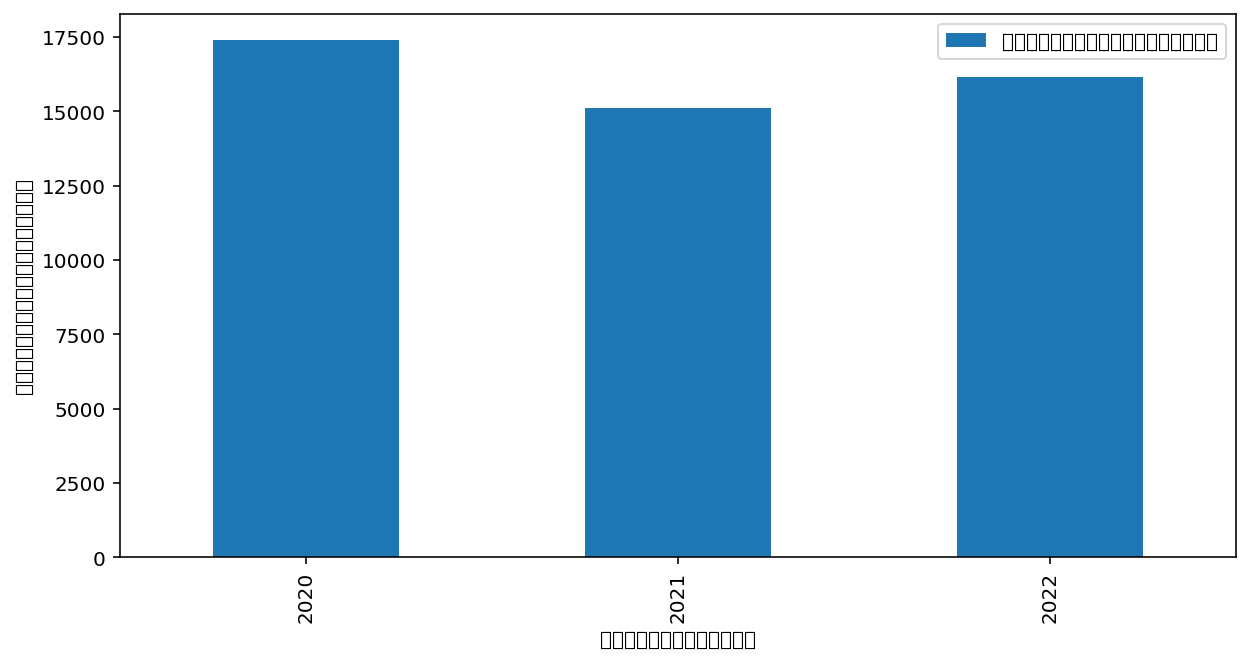

In [ ]:
df2.plot(kind='bar', figsize=(10,5), ylabel='รวมจำนวนผู้บาดเจ็บ')
#df2.plot(kind='pie', y='จำนวนผู้บาดเจ็บสาหัส', legend=False, autopct='%.f')

In [ ]:
alldf.isnull().sum()

ปีที่เกิดเหตุ                                  0
วันที่เกิดเหตุ                                 0
เวลา                                           0
วันที่รายงาน                                   3
เวลาที่รายงาน                                  3
ACC_CODE                                       0
หน่วยงาน                                       0
รหัสสายทาง                                 21054
สายทาง                                      2018
ก.ม.                                         447
จังหวัด                                       23
รถคันที่ 1                                   962
บริเวณที่เกิดเหตุ/ลักษณะทาง                 6011
มูลเหตุสันนิษฐาน                            1282
ลักษณะการเกิดอุบัติเหตุ                     2345
สภาพอากาศ                                     59
LATITUDE                                     353
LONGITUDE                                    353
จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)               0
จำนวนที่เกิดเหตุทั้งหมด (รวมคนเดินเท้า)    21052
รถจักรยานยนต์       

In [ ]:
#word_col= 'มูลเหตุสันนิษฐาน'

all_words = ''.join(str(df2['มูลเหตุสันนิษฐาน']).lower())
all_word = re.sub('(\n|\s{2})', '', all_words)
all_word 
#all_words = ' '.join(str[df['มูลเหตุสันนิษฐาน']].lower()) 
#all_words[:20]

'0 เมาสุรา1 ใช้โทรศัพท์เคลื่อนที่ขณะขับรถ2 ขับรถเร็วเกินอัตรากำหนด7คน/รถ/สัตว์ตัดหน้ากระชั้นชิด44 หลับใน52 อุปกรณ์ยานพาหนะบกพร่อง60ระบบไฟฟ้าของยานพาหนะขัดข้อง61ขับรถย้อนศร62ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร84ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ99nan114 ไม่ให้สัญญาณชะลอ/เลี้ยว118 แซงรถอย่างผิดกฎหมาย144เปลี่ยนช่องทางกะทันหัน146ขับรถตามกระชั้นชิด159ทางโค้งอันตราย269แสงสว่างไม่เพียงพอ357มีกองวัสดุ/สิ่งกีดขวาง447 อื่นๆ474ฝ่าฝืนป้ายหยุดขณะออกจากทางร่วมทางแยก648ไม่ยอมให้รถที่มีสิทธิ์ไปก่อน782ถนนชำรุด854 บรรทุกเกินอัตรา1582 ระบบห้ามล้อขัดข้อง/ระบบเบรกชำรุด1632การซ่อม/สร้างบนสายทาง1647 ขับรถคร่อมเส้นแบ่งทิศทาง1669 รถเสียไม่แสดงเครื่องหมายหรือสัญญาณไฟที่กำหนด2273 ยางเสื่อมสภาพ/ยางแตก2473 ไม่ให้สัญญาณเข้าจอด/ออกจากที่จอด2753ไม่มีมูลเหตุสันนิษฐานที่เกี่ยวข้องด้านผู้ขับขี่3127 ไม่มีป้ายจราจร3234ถนนลื่น3941มีสิ่งรบกวนภายนอกรถ3946 ไม่มีมูลเหตุสันนิษฐานที่เกี่ยวข้องด้านยานพาหนะ3979 ไม่มีมูลเหตุสันนิษฐานที่เกี่ยวข้องด้านสภาพสายทาง4802 ไม่มีเส้นแบ่งทิศทางจราจร5564 ระยะการมองเห็นไม่เพียงพอ5920 สูญเสียการควบคุม5

In [ ]:
stopwords = {'0','1','2','3','4','5','6','7','8','9'} # set
print(stopwords)

{'3', '6', '4', '7', '1', '9', '5', '8', '2', '0'}


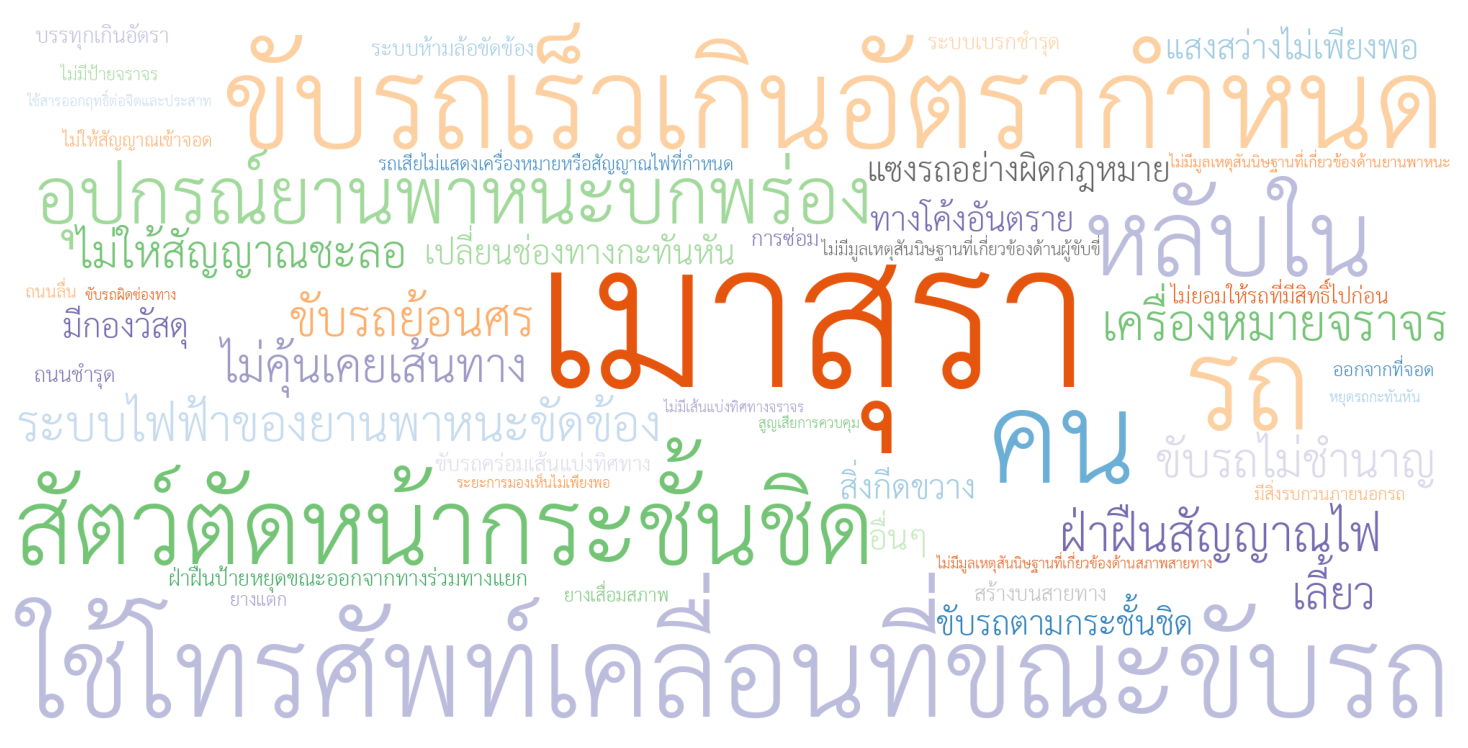

In [ ]:
wordcloud = WordCloud(
#     font_path='c:/windows/fonts/browalia.ttc',
      font_path='/content/THSarabunNew.ttf',
#     font_path='font_path/Kanit-Black.ttf',
#     font_path='font_path/Fahkwang-Medium.ttf',
    regexp=r"[\u0E00-\u0E7F']+" ,

    stopwords=stopwords,
    width=2000, height=1000,

    prefer_horizontal=9,
    max_words=50, 

#     colormap='viridis', # default matplotlib colormap
    colormap='tab20c',
#     colormap='plasma',
    background_color = 'white').generate(all_word)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()


In [ ]:
#df2.plot(kind='bar', figsize=(20,12), ylabel='จำนวนผู้บาดเจ็บสาหัส')
#df2.plot(kind='pie', y='จำนวนผู้บาดเจ็บสาหัส', legend=False, autopct='%.f')

In [ ]:
cols1 = ['มูลเหตุสันนิษฐาน']
data1 = pd.read_csv('/content/file/accident2019.csv' ,usecols=cols1)
data2 = pd.read_csv('/content/file/accident2020.csv', usecols=cols1)
data3 = pd.read_csv('/content/file/accident2021.csv', usecols=cols1)
data4 = pd.read_csv('/content/file/accident2022.csv', usecols=cols1)
pdlist = [data1, data2,data3, data4]
da = pd.concat(pdlist)
data5 = da[da.duplicated()==0]
data5.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,มูลเหตุสันนิษฐาน
0,เมาสุรา
1,ขับรถเร็วเกินอัตรากำหนด
4,คน/รถ/สัตว์ตัดหน้ากระชั้นชิด
6,ไม่ยอมให้รถที่มีสิทธิ์ไปก่อน
14,ไม่ให้สัญญาณชะลอ/เลี้ยว


In [ ]:
all_words1 = ''.join(str(data5['มูลเหตุสันนิษฐาน']).lower())
all_word1 = re.sub('(\n|\s{2})', '', all_words1)
all_word1 

'0 เมาสุรา1 ขับรถเร็วเกินอัตรากำหนด4คน/รถ/สัตว์ตัดหน้ากระชั้นชิด6ไม่ยอมให้รถที่มีสิทธิ์ไปก่อน14ไม่ให้สัญญาณชะลอ/เลี้ยว22 หลับใน37ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร47nan109 ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ138อุปกรณ์ยานพาหนะบกพร่อง151 แซงรถอย่างผิดกฎหมาย198ขับรถตามกระชั้นชิด212 อื่นๆ237ฝ่าฝืนป้ายหยุดขณะออกจากทางร่วมทางแยก286 บรรทุกเกินอัตรา499แสงสว่างไม่เพียงพอ832รถเสียไม่แสดงเครื่องหมายหรือสัญญาณไฟที่กำหนด1285 เปลี่ยนช่องทางกะทันหัน1384 มีกองวัสดุ/สิ่งกีดขวาง1565ขับรถย้อนศร1603 ระบบห้ามล้อขัดข้อง/ระบบเบรกชำรุด1792โรคประจำตัว1875ระบบไฟฟ้าของยานพาหนะขัดข้อง2013ขับรถผิดช่องทาง2062 ขับรถคร่อมเส้นแบ่งทิศทาง2342 ทางโค้งอันตราย2346 ไม่ให้สัญญาณเข้าจอด/ออกจากที่จอด2693ถนนลื่น2892 ไม่มีป้ายจราจร3699 หยุดรถกะทันหัน5300ใช้โทรศัพท์เคลื่อนที่ขณะขับรถ6005ขับรถไม่เปิดไฟ/ไม่ใช้แสงสว่างตามกำหนด6729 ยางเสื่อมสภาพ/ยางแตก6810มีสิ่งบดบังการมองเห็น8507 ระบบสัญญาณไฟจราจรขัดข้อง11009รถเสียไม่แสดงเครื่องหมาย/สัญญาณตามที่กำหนด15552ถนนแคบ16263 ระบบบังคับเลี้ยวขัดข้อง16671 อุปกรณ์นำทางชำรุด18835ระยะการมองเห็นไม่เพียงพ

In [ ]:
stopwords = {'NaN'} # set
print(stopwords)

{'NaN'}


In [ ]:
wordcloud = WordCloud(
#     font_path='c:/windows/fonts/browalia.ttc',
      font_path='/content/font/THSarabunNew.ttf',
#     font_path='font_path/Kanit-Black.ttf',
#     font_path='font_path/Fahkwang-Medium.ttf',
    regexp=r"[\u0E00-\u0E7F']+" ,

    stopwords=stopwords,
    width=2000, height=1000,

    prefer_horizontal=9,
    max_words=60, 

#     colormap='viridis', # default matplotlib colormap
    colormap='tab20',
#     colormap='plasma',
    background_color = 'white').generate(all_word1)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
#plt.show()

In [ ]:

age22 = pd.read_excel('/content/age65.xlsx')
age21 = pd.read_excel('/content/age64.xlsx')
age20 = pd.read_excel('/content/age63.xlsx')



In [ ]:
age_list = [age22, age21,age20 ]
all_age = pd.concat(age_list)
all_age

,รหัสจ.ที่เสียชีวิต (group),จ.ที่เสียชีวิต,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,...,65-69,70-74,75-79,80-84,85-89,90-94,95-99,ไม่ทราบอายุ,Grand Total,>=100
0,10,กรุงเทพมหานคร,12.0,2.0,11.0,35.0,99.0,103.0,67.0,70.0,...,23.0,22.0,8.0,5.0,1.0,NaN,NaN,29.0,725,NaN
1,11,สมุทรปราการ,4.0,1.0,2.0,12.0,34.0,39.0,26.0,13.0,...,8.0,10.0,3.0,1.0,1.0,NaN,NaN,8.0,234,NaN
2,12,นนทบุรี,3.0,1.0,2.0,9.0,25.0,24.0,21.0,15.0,...,6.0,5.0,2.0,2.0,NaN,NaN,NaN,2.0,174,NaN
3,13,ปทุมธานี,1.0,4.0,5.0,18.0,43.0,47.0,21.0,19.0,...,4.0,3.0,1.0,1.0,1.0,NaN,NaN,12.0,257,NaN
4,14,พระนครศรีอยุธยา,1.0,1.0,6.0,30.0,40.0,30.0,27.0,21.0,...,9.0,9.0,2.0,1.0,1.0,NaN,NaN,3.0,255,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,93,พัทลุง,2.0,1.0,5.0,11.0,8.0,8.0,6.0,10.0,...,9.0,7.0,7.0,4.0,NaN,NaN,NaN,7.0,132,NaN
74,94,ปัตตานี,3.0,1.0,8.0,12.0,12.0,11.0,5.0,4.0,...,7.0,9.0,4.0,4.0,1.0,NaN,NaN,7.0,119,NaN
75,95,ยะลา,4.0,2.0,2.0,12.0,3.0,4.0,6.0,4.0,...,2.0,5.0,3.0,1.0,NaN,1.0,NaN,2.0,73,NaN
76,96,นราธิวาส,2.0,1.0,9.0,16.0,9.0,12.0,13.0,10.0,...,6.0,8.0,2.0,4.0,3.0,NaN,NaN,7.0,145,NaN


In [ ]:
age1 = pd.read_excel('/content/ตาราง 2.xlsx')
age1

,รหัสจ.ที่เสียชีวิต (group) 2,จ.ที่เสียชีวิต,รถจักรยานยนต์,รถยนต์,คนเดินเท้า,รถบรรทุกขนาดเล็ก/รถตู้,รถจักรยาน,รถบรรทุกหนัก,สามล้อ,รถโดยสาร,รถเพื่อการเกษตร,ไม่ระบุพาหนะ,Grand Total
0,10,กรุงเทพมหานคร,474,17.0,2.0,8.0,3.0,2.0,NaN,1.0,NaN,218.0,725
1,11,สมุทรปราการ,163,8.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,58.0,234
2,12,นนทบุรี,95,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,72.0,174
3,13,ปทุมธานี,128,12.0,1.0,7.0,5.0,NaN,NaN,NaN,NaN,104.0,257
4,14,พระนครศรีอยุธยา,132,12.0,5.0,8.0,2.0,2.0,NaN,NaN,1.0,93.0,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,94,ปัตตานี,48,7.0,3.0,6.0,3.0,1.0,NaN,NaN,NaN,35.0,103
75,95,ยะลา,51,4.0,NaN,2.0,8.0,NaN,NaN,NaN,NaN,21.0,86
76,96,นราธิวาส,44,12.0,4.0,3.0,5.0,2.0,NaN,NaN,NaN,31.0,101
77,ไม่ทราบจังหวัด,ไม่ทราบจังหวัด,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
